# Stellar Structure Models -> Polytropes

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
%matplotlib inline

### Constants values

In [5]:
Msun = 1.989e33 #sun mass [g]
Rsun = 6.96e10 #sun radius [cm]
n = 3 #polytropic index
Rho = 1.41 #sun mean density [g/cm^3]
X = 0.70 #hydrogen percentual
Y = 0.28 #helium percentual 
Z = 0.02 #metals percentual
Mi = 1.0/(2.0*X + 0.75*Y + 0.5*Z) #
R = 8.315e7 #Universal gas constant [erg/mol/K]
#T_EoS = 1.5e7 #
G = 6.67259e-8 #gravitational constant [cm3/g/s^2] 
step = 1e-3 #arbitrary step
kappa = 0.2*(1+X) #mean opacity [cm^2/g]
c = 3e10 #light velocity [cm/s]
sigma = 5.6704e-5 # radiation constant [erg/cm^2/s^1/K^4] 
mH = 1.6737236e-24 # mass of hydrogen [g]
kb = 1.3807e-16 #Boltzmann's constant [cm^2 g s-2 K-1]

### The Lane-Emden equations:

\begin{equation}
\frac{1}{z}\frac{d}{dz}\left( z^{2} \frac{dw}{dz} \right) + w^{n} = 0
\end{equation}

### Initial conditionals

In [6]:
w0 = 1 #w(r=0) = 0
dwdz0 = 0 #dw/dz(r=0) = 0
z0 = 1e-4 #2/z --> infinite
M0 = 0 #mass in the center

#### Creating empty lists for each variable
Z = [z0,0]
W = [w0,0]
dW = [dwdz0,0]

### Lane-Emden equations in computacional language:

\begin{equation}
\left(\frac{dw}{dz}_{i+1}\right) = - \Delta z \left( \frac{2}{z}_i \frac{dw}{dz}_i + w^{n}_i \right) + \left(\frac{dw}{dz}_i\right)
\end{equation}

\begin{equation}
w_{i+1} = w_{i} + \Delta z \left(\frac{dw}{dz}_{i+1} \right)
\end{equation}


In [7]:
#The loop below makes the loop of the equations above to solve the
#Lane-Emden equations.The condition to stop is w --> 0, because it
#is related to the
#density of the star.

i=0
while W[i] >= 0:
    dW[i+1] = - step*((2/Z[i])*(dW[i]) + (W[i]**n)) + dW[i]
    W[i+1] = W[i] + step*dW[i]    
    Z[i+1] = Z[i] + step    
    dW.append(dW[i+1])
    W.append(W[i+1])
    Z.append(Z[i+1])
    i += 1

### Calculating the estimated radius of the Sun:

We have $z~\leftrightarrow~r$. 
When $w~\rightarrow~0$, we have the polytropic radius, $z_n$, whereas $A~=~z_n/R_{sun}$

Text(0,0.5,'$\\omega(z)$')

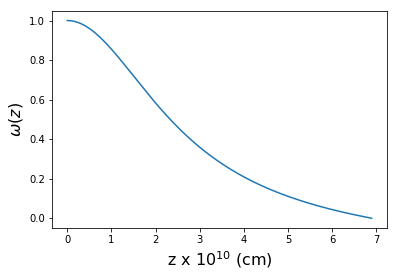

In [28]:
#Plotting w(z) ~ z

plt.plot(Z,W)
plt.xlabel(r'z x $10^{10}$ (cm)',fontsize=16)
plt.ylabel(r'$\omega(z)$',fontsize=16)

In [9]:
z3 = Z[-1] 

In [11]:
A = z3/Rsun
print('The value of the constant A is %s cm^-1' %A)

The value of the constant A is 9.906752873564135e-11 cm^-1


In [29]:
#Listing  the values of the radius accordingly to the z
r = [z/A for z in Z]

### Central Density of the Sun & rho(r)

From the Lane-Emden equation, we have the central density calculated as:

\begin{equation}
\rho_c = \rho_{mean} \left( \left( \frac{-3}{z} \frac{dw}{dz} \right)_{z = z_n} \right) ^{-1}
\end{equation} 

And the density at each radius:
\begin{equation}
\rho(w) = \rho_c w^{n}
\end{equation} 

In [13]:
dw_dz_imax = dW[-1]*10**10 #dw/dz at z=zn
rho_c = Rho / (-(3/(z3*10**10)*(dw_dz_imax)))
print("The central density is %s g/cm/s^2" %rho_c)

The central density is 76.38615051470848 g/cm/s^2


In [14]:
##The density for each radius
rho_r = [rho_c*(w**n) for w in W]

Text(0,0.5,'rho $[g/cm/s^2]$')

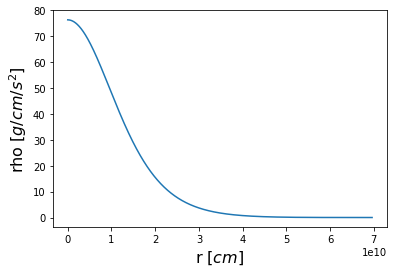

In [15]:
plt.plot(r[1:],rho_r[1:])
plt.xlabel(r'r $[cm]$',fontsize=16)
plt.ylabel(r'rho $[g/cm/s^2]$',fontsize=16)

### Central Pressure of the Sun & P(r)

From the polytropic equation of state, we have for the central pressure:

\begin{equation}
P_c = K \rho_c^{\gamma}, ~\gamma = 1 + \frac{1}{n}
\end{equation} 

Where, for the polytropic constant K, we have:

\begin{equation}
K = \frac{\pi G \rho_c^{2/3}}{A^2}, ~A = \frac{z_n}{R_{sun}}
\end{equation} 

And for the pressure at each radius, we have:

\begin{equation}
P(w) = P_c w^{n+1}
\end{equation} 



In [33]:
##For the polytropic constant, we have:
K = np.pi*G*(rho_c**(2/3))/(A**2)
print('The value of the polytropic constant K is %.2f cm^3/s^2/g^(1/3)' %K)

The value of the polytropic constant K is 384525138033124.25 cm^3/s^2/g^(1/3)


In [30]:
#Using the polytropic equation
gamma = 1 + 1/n
P_c = K*((rho_c)**(gamma))
print('The value of the central pressure is %.2f g/cm/s^2.' %P_c)

The value of the central pressure is 124626644610144192.00 g/cm/s^2.


In [18]:
##The pressure for each radius
P_r = [P_c*(w**n+1) for w in W]

Text(0,0.5,'P $[g/cm/s^2]$')

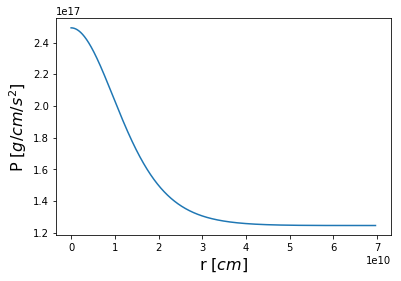

In [19]:
plt.plot(r[1:],P_r[1:])
plt.xlabel(r'r [$cm$]',fontsize=16)
plt.ylabel(r'P $[g/cm/s^2]$',fontsize=16)

### Calculating the estimate central temperature of the Sun

We can calculate the central temperature throught the ideal gas equation:

\begin{equation}
P = \frac{T\rho\Re}{\mu} \Rightarrow T_c = \frac{P_c\mu}{\rho_c\Re}
\end{equation}

In [34]:
#Using the ideal gas equation
Tc = Mi*P_c/(R*rho_c)
print('The central temperature of the sun is %.2f K.' %Tc)

The central temperature of the sun is 12112087.79 K.


In [21]:
##The temperature for each radius
T_r = [(P_c/rho_c)*(Mi/R)*w for w in W]

Text(0,0.5,'T [K]')

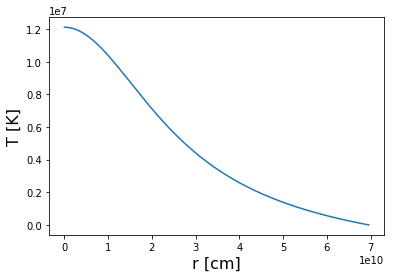

In [22]:
plt.plot(r[1:],T_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('T [K]',fontsize=16)

## Mass(r)

For the mass, we use the structure equation of continuity:

\begin{equation}
\frac{dM_r}{dr} = 4\pi r^2\rho
\end{equation}

In a mathematical approach, we have:

\begin{equation}
M_{i+1} = \frac{\Delta z}{A} 4 \pi r^{2} \rho_i + M_i
\end{equation}

In [36]:
##The mass for each radius
M_r = [0,0]

for i in range(0,len(rho_r)-1):
    M_r[i+1] = (step/A)*4*math.pi*rho_r[i]*(r[i]**2) + M_r[i]
    M_r.append(M_r[i+1])

print('The total Mass of the Sun is %s g.' %M_r[-1])

The total Mass of the Sun is 1.9917039689132917e+33 g.


Text(0,0.5,'M [g]')

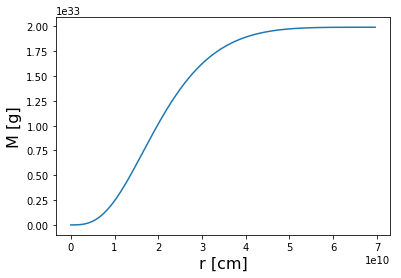

In [24]:
plt.plot(r[:],M_r[:-1])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('M [g]',fontsize=16)

### Luminosity

For luminosity, we use the radiation pressure equilibrium equation:

\begin{equation}
\frac{dL_r}{dr} = 4\pi r^2\rho \epsilon
\end{equation}

In a mathematical approach, we have:

\begin{equation}
L_{i+1} = \frac{\Delta z}{A} 4 \pi r^{2} \rho_i \epsilon + L_i
\end{equation}

In [26]:
##The Luminosity for each radius
L_r = [0,0]
eff=10

for i in range(0,len(rho_r)-1):
    L_r[i+1] = (step/A)*4*math.pi*rho_r[i]*(r[i]**2)*eff + L_r[i]
    L_r.append(M_r[i+1])

print("Solar luminosity is %s ergs/cm^2/s" %L_r[-1])

Solar luminosity is 1.9917039689132917e+33 ergs/cm^2/s


Text(0,0.5,'L []')

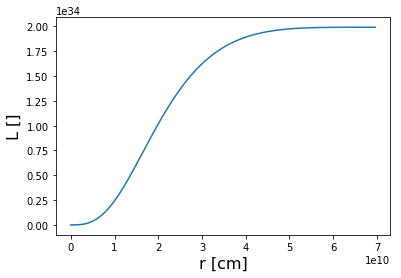

In [27]:
plt.plot(r[:],L_r[:-1])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('L []',fontsize=16)

## dT/dr for radiation

In [ ]:
dT = [0,0]

for i in range(0,len(rho_r)-1):
    L_r[i+1] = (step/A)*4*math.pi*rho_r[i]*(r[i]**2)*eff + L_r[i]
    L_r.append(M_r[i+1])

In [ ]:
plt.plot(r[1:],L_r[1:])
plt.xlabel('r [cm]',fontsize=16)
plt.ylabel('P [?]',fontsize=16)